## **Library**

In [ ]:
!pip install ucimlrepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_absolute_error, mean_squared_error

## Preprossesing dan EDA

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [ ]:
df.isna().sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
columns = df.columns.drop('Outcome')
df[columns] = df.groupby('Outcome')[columns].transform(lambda x: x.fillna(x.median()))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


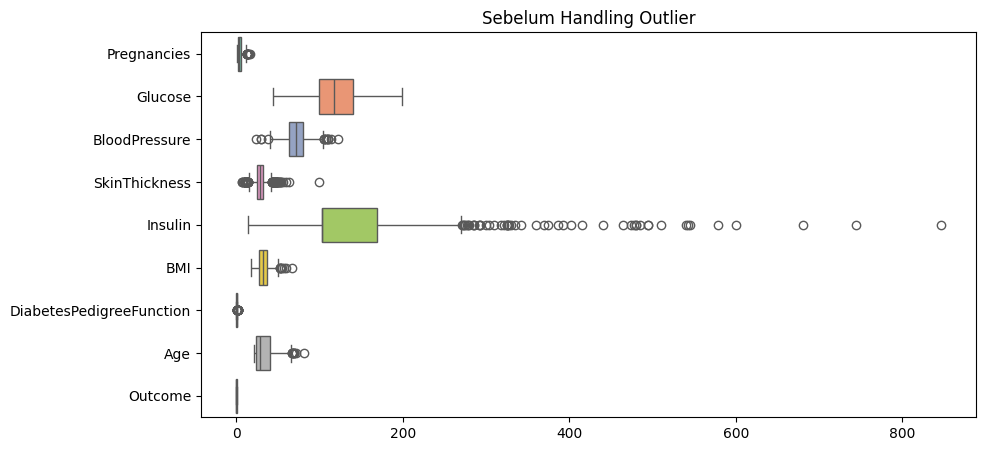

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, orient='h', palette="Set2")
plt.title("Sebelum Handling Outlier")
plt.show()

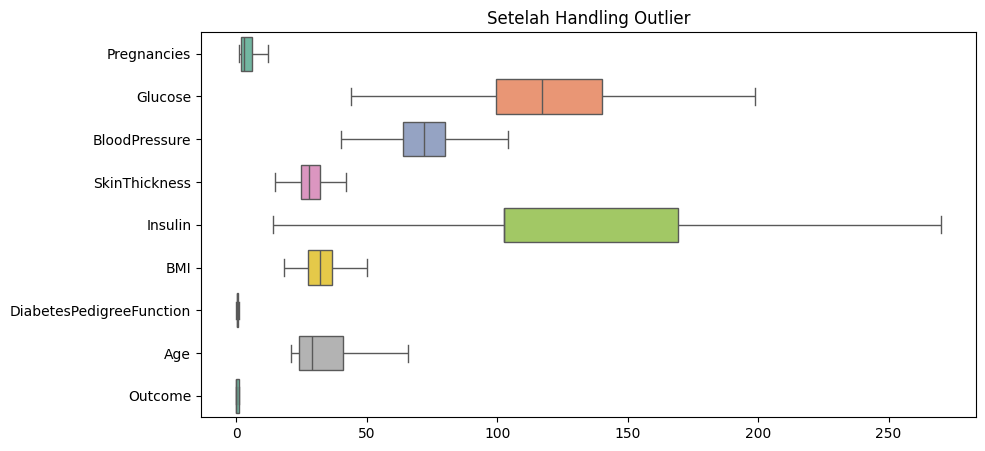

In [ ]:
from scipy.stats.mstats import winsorize

columns = df.columns.drop('Outcome', 'Glucose')

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_below = (df[col] < lower_bound).sum()
    outliers_above = (df[col] > upper_bound).sum()
    total_data = len(df[col])

    low_limit = outliers_below / total_data
    high_limit = outliers_above / total_data
    # Terapkan Winsorizing
    df[col] = winsorize(df[col], limits=[low_limit, high_limit])

plt.figure(figsize=(10,5))
sns.boxplot(data=df, orient='h', palette="Set2")
plt.title("Setelah Handling Outlier")
plt.show()

<Axes: xlabel='Age'>

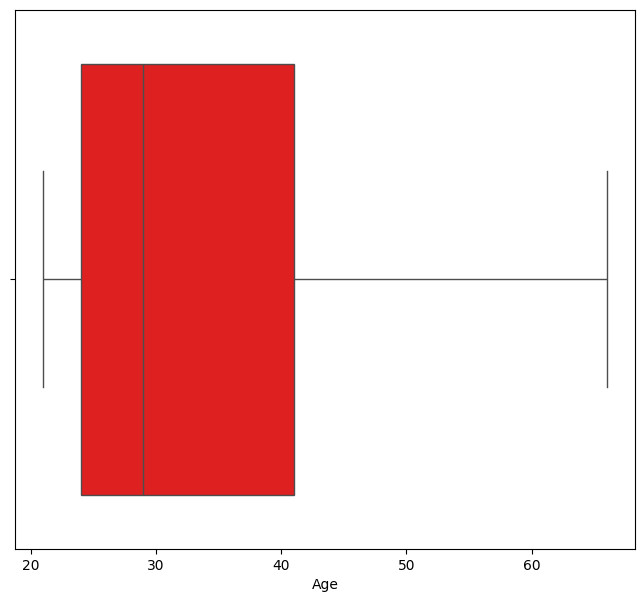

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Age"], color="red")

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


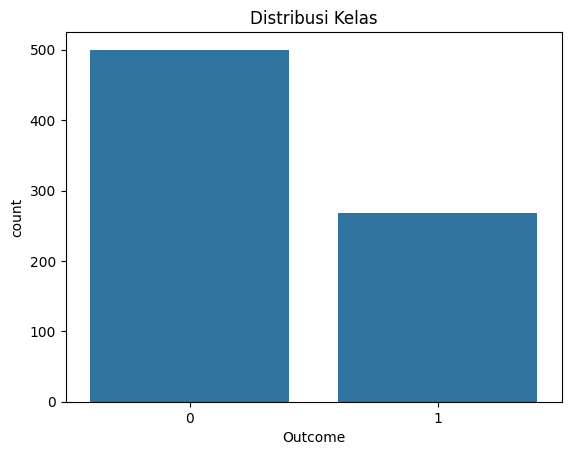

In [ ]:
# Cek distribusi kelas
print(df['Outcome'].value_counts())

# Jika ingin dalam bentuk proporsi:
print(df['Outcome'].value_counts(normalize=True))
sns.countplot(x=df['Outcome'])
plt.title("Distribusi Kelas")
plt.show()

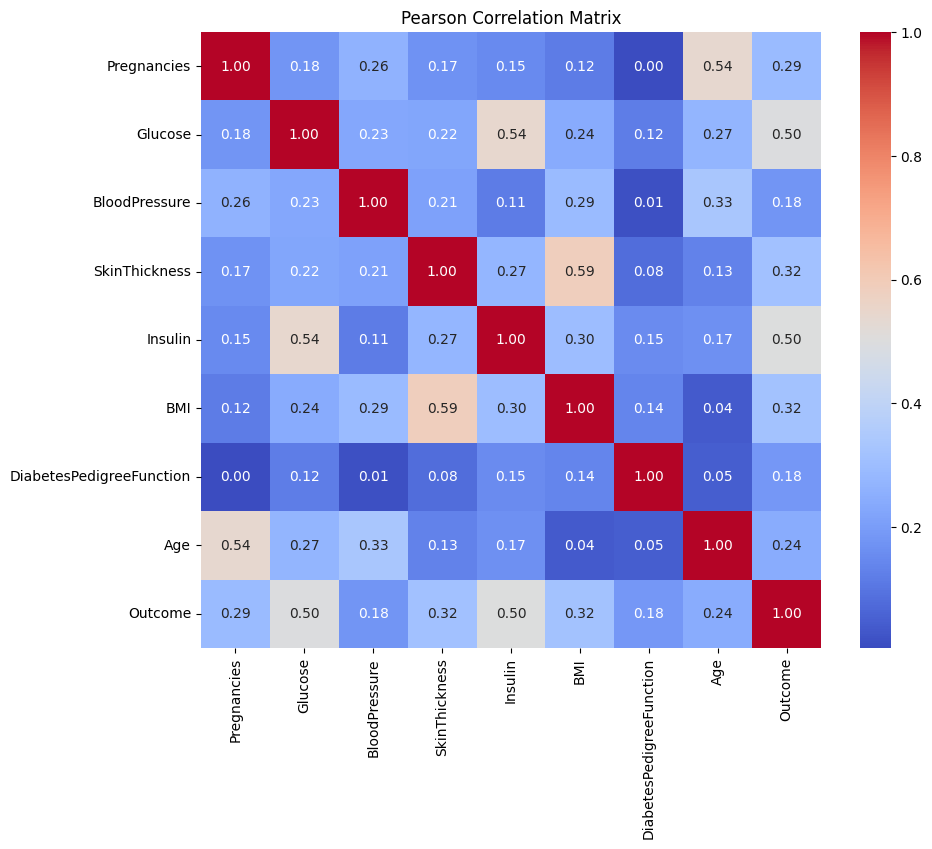

In [ ]:
# Hitung korelasi Pearson
correlation_matrix = df.corr(method='pearson')

# Visualisasi heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()


Distribusi Kelas di Train Set:


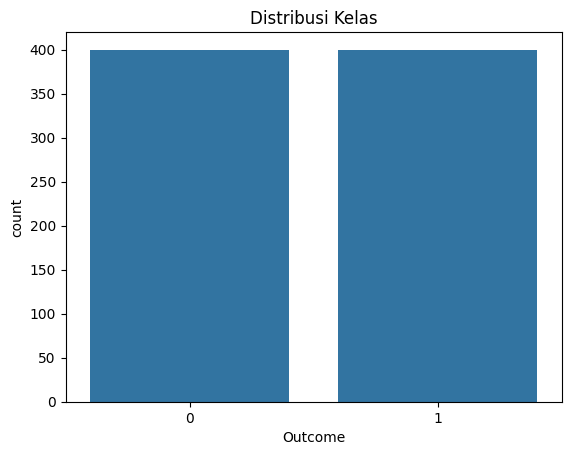

In [ ]:
from imblearn.over_sampling import SMOTE
#SPIT DATASET
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Cek distribusi kelas
print("\nDistribusi Kelas di Train Set:")
sns.countplot(x=y_train)
plt.title("Distribusi Kelas")
plt.show()

# **MODELING**

Akurasi: 0.8950

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       100
           1       0.89      0.90      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200

F1 Score: 0.8955


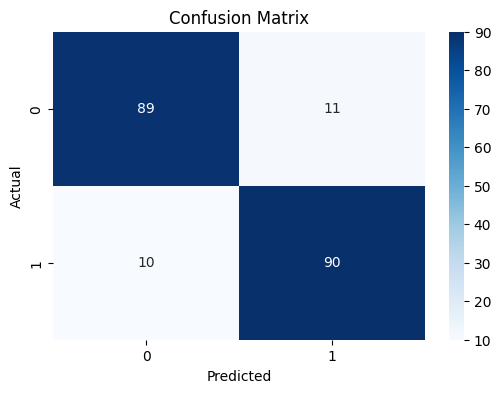

In [ ]:
# Decision Tree
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42, max_features='sqrt')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}


grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9100000000000001


random forest

Akurasi Random Forest: 0.9050

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.89      0.92      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



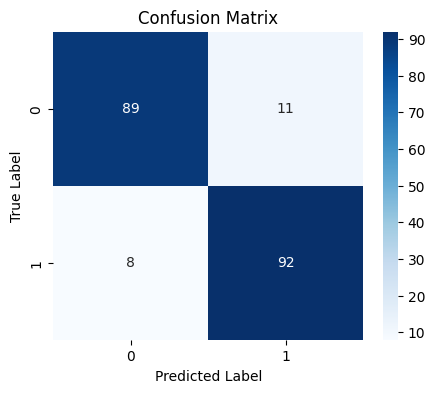

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, bootstrap=True, max_depth=10)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Random Forest: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Evaluasi

In [ ]:
import numpy as np
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).head(10))


Insulin                     0.339509
Glucose                     0.163546
SkinThickness               0.146067
BMI                         0.084325
Pregnancies                 0.079624
Age                         0.073095
DiabetesPedigreeFunction    0.063829
BloodPressure               0.050006
dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score

# Latih model dengan data training
rf.fit(X_train, y_train)

# Prediksi pada data training
y_train_pred = rf.predict(X_train)

# Prediksi pada data testing
y_test_pred = rf.predict(X_test)

# Hitung akurasi pada data training
acc_train = accuracy_score(y_train, y_train_pred)
print("Train Accuracy RF:", acc_train)

# Hitung akurasi pada data testing
acc_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy RF:", acc_test)


Train Accuracy RF: 1.0
Test Accuracy RF: 0.895
